# Введение

Задача с сорвенования
https://zindi.africa/competitions/predictive-insights-youth-income-prediction-challenge

Безработица среди молодежи и неполная занятость являются серьезной проблемой для любой развивающейся страны и служат важным предиктором экономического здоровья и процветания. Возможность предсказать и понять, какие молодые люди найдут работу, а каким потребуется дополнительная помощь, помогает способствовать принятию обоснованных решений, поддерживает расширение экономических прав и возможностей и позволяет молодым людям преуспевать в выбранной ими карьере.

Целью этой задачи является создание модели машинного обучения, которая прогнозирует занятость молодежи на основе данных исследований рынка труда в Южной Африке.

Это решение поможет таким организациям, как Predictive Insights, получить базовый прогноз результатов трудоустройства молодых людей, что позволит им разрабатывать и тестировать меры, которые помогут молодежи выйти на рынок труда или улучшить свои заработки.

Так же попробуем в отдельном ноутбуке кластеризовать опрошенных по социальным признакам.

# Данные

Данные для этой задачи получены в результате четырех раундов опроса молодежи на рынке труда Южной Африки, проводимых с интервалом в 6 месяцев. Каждый человек в наборе данных был опрошен за год до последующего опроса («исходные» данные). Задача в том, чтобы спрогнозировать, занят ли человек при последующем опросе, на основе его статуса на рынке труда и других характеристик во время базового исследования.

Обучающий набор состоит из одной строки или наблюдения для каждого человека — информация, собранная на исходном уровне, плюс только целевой результат (независимо от того, были ли они трудоустроены или нет) год спустя. Набор тестов состоит из данных, собранных на исходном уровне, без учета целевого результата.

Необходим прогноз, будет ли молодой человек трудоустроен через год после базового исследования, основываясь на его демографических характеристиках, предыдущем и текущем опыте на рынке труда и результатах образования, а также предоставить простой для понимания и содержательный анализ. 

<b>Описания полей:</b>

- <b> Target </b>- целевая перменная, будет трудоустроен человек в течение года: 1 - да, 0 - нет
- Person_id - Идентификатор человека
- Survey_date - Дата опроса
- Round - Раунд опроса
- Status - Тип занятости
- Tenure - Длительность статуса в днях. Если человек работает или учится, это то стаж работы или учебы, а если безработный, то, как давно человек без работы. Например, чем больше срок, тем лучше показатель для работающих и хуже для безработных.
- Geography - Годод/село
- Province - Регион ЮАР     
- Matric - Наличие аттестата об окончании школы ЮАР: 1 - да, 0 - нет
- Degree  - Наличие научной степени 
- Diploma - Наличие диплома о высшем образовании
- Schoolquintile - Квантиль школы в по систему ЮАР (см. примечание ниже)
- Math и Mathlit - два варианта математики, взятые в матрице. Ученики должны сдавать один тип и не могут оба
- Additional_lang - Школный бал в процентах по начальному англискому языку
 <br>Обратим внимание, что английский - официальный язык ЮАР, но по факту в рейтинге языков, на которых говорят граждане, он занимает пятое место. Это не самый распространённый язык для повседневного общения 
- Home_lang - Школный бал в процентах по угулбленному англискому языку
- Science - Школный бал в процентах по предмету "Наука" (В ЮАР в один предмет входят физика и химия)
- Female - Женский пол: 1 - да, 0 - мужской
- Sa_citizen  - Наличие гражданства ЮАР: 1 - да, 0- нет
- Birthyear - Год рождения
- Birthmonth - Месяц рождения  

<b>Примечание</b>

В Южной Африке система образования делит школы на пять квинтилей в зависимости от их социально-экономических условий. Школы квинтиля 1 (Q1), за которыми следуют школы Q2, являются самыми бедными и получают наибольшее государственное финансирование, в то время как школы Q4 и Q5 (платные школы) испытывают наименьшие экономические трудности и получают самое низкое финансирование.

# Разведочный анализ данных (EDA)

In [1]:
# Импорт необходимых библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Импорт данных (таблицы из файла)
df = pd.read_csv('Train.csv')

In [3]:
# Общая информаця о признаках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Person_id        4020 non-null   object 
 1   Survey_date      4020 non-null   object 
 2   Round            4020 non-null   int64  
 3   Status           4020 non-null   object 
 4   Tenure           2626 non-null   float64
 5   Geography        4020 non-null   object 
 6   Province         4020 non-null   object 
 7   Matric           3012 non-null   float64
 8   Degree           2189 non-null   float64
 9   Diploma          2211 non-null   float64
 10  Schoolquintile   2359 non-null   float64
 11  Math             997 non-null    object 
 12  Mathlit          1353 non-null   object 
 13  Additional_lang  2018 non-null   object 
 14  Home_lang        381 non-null    object 
 15  Science          732 non-null    object 
 16  Female           4020 non-null   int64  
 17  Sa_citizen    

В некоторых столбцах есть пропуски в данных. Позже заполним их.
Так же есть плохо заполненные признаки (Math, Home_lang, Science). Пока не будем их удалять, посмотрим на них  тоже. В задаче кластеризации они могут оказаться важными.

In [4]:
# Описательные статистики для числовых признаков, в т. ч. бинаризованных.
df.describe()

,Round,Tenure,Matric,Degree,Diploma,Schoolquintile,Female,Sa_citizen,Birthyear,Birthmonth,Target
count,4020.000000,2626.000000,3012.000000,2189.000000,2211.000000,2359.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000
mean,3.129851,582.883092,0.850598,0.078118,0.081411,2.696482,0.564428,0.999502,1997.462935,5.344030,0.271891
std,0.978014,621.220657,0.356544,0.268418,0.273527,1.318409,0.495893,0.022302,4.378334,3.805916,0.444989
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1972.000000,1.000000,0.000000
25%,2.000000,95.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1995.000000,1.000000,0.000000
50%,3.000000,395.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1999.000000,5.000000,0.000000
75%,4.000000,819.000000,1.000000,0.000000,0.000000,4.000000,1.000000,1.000000,2000.000000,9.000000,1.000000
max,4.000000,3560.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,2004.000000,12.000000,1.000000


Отрицательных значений в минимальных нет, минимальный год рождения 1972, максимальный 2004. Месяца аналогично 1 и 12. Видим, что среди опрошенных большую часть составляют молодые женщины, родившиеся в 2000 году и позже.

In [5]:
# Описательные статистики для категориальных признаков
df.describe(include=["object"])

,Person_id,Survey_date,Status,Geography,Province,Math,Mathlit,Additional_lang,Home_lang,Science
count,4020,4020,4020,4020,4020,997,1353,2018,381,732
unique,4020,79,7,3,9,7,7,6,6,7
top,Id_eqz61wz7yn,2023-02-13,unemployed,Urban,Gauteng,0 - 29 %,40 - 49 %,50 - 59 %,50 - 59 %,30 - 39 %
freq,1,121,1775,2797,1170,321,420,820,140,263


Уникальных значений категориальных признаков, которые можно использовать в исследовании, немного, до 7.
PersonID и Survey_date (Дата опроса) удалим, как не влияющие на исследование.

In [6]:
# Первые пять строк таблицы
df.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


In [7]:
# Число уникальных значений
df.nunique()

Person_id          4020
Survey_date          79
Round                 4
Status                7
Tenure              641
Geography             3
Province              9
Matric                2
Degree                2
Diploma               2
Schoolquintile        6
Math                  7
Mathlit               7
Additional_lang       6
Home_lang             6
Science               7
Female                2
Sa_citizen            2
Birthyear            30
Birthmonth           12
Target                2
dtype: int64

В числовых признаках Tenure и Birthyear много уникальных, позже рассомтрим их подробнее.

In [8]:
# Проверим столбцы на уникальные значения, где их не так много и легко просмотреть визуально
# Выведем уникальные значения
l = list(df.columns)

# Выведем без идентификатора, даты и круга опроса
l = l[3:-3]
l.remove('Tenure')
for i in l:
    print(df[i].value_counts(ascending=True))

wage and self employed       7
employment programme        31
self employed              200
other                      278
wage employed              763
studying                   966
unemployed                1775
Name: Status, dtype: int64
Suburb     420
Rural      803
Urban     2797
Name: Geography, dtype: int64
Northern Cape      85
Free State        256
North West        261
Western Cape      279
Eastern Cape      329
Mpumalanga        363
Limpopo           421
KwaZulu-Natal     856
Gauteng          1170
Name: Province, dtype: int64
0.0     450
1.0    2562
Name: Matric, dtype: int64
1.0     171
0.0    2018
Name: Degree, dtype: int64
1.0     180
0.0    2031
Name: Diploma, dtype: int64
0.0     67
5.0    275
4.0    329
1.0    445
2.0    504
3.0    739
Name: Schoolquintile, dtype: int64
80 - 100 %     11
70 - 79 %      21
60 - 69 %      49
50 - 59 %      99
40 - 49 %     197
30 - 39 %     299
0 - 29 %      321
Name: Math, dtype: int64
80 - 100 %     13
70 - 79 %      50
0 - 29 %    

Признаки заполнены аккуратно, без дублей.
Во всех столбцах есть некий разброс значений, кроме "Sa_citizen". Здесь почти все значения одинаковые. Для обучения алгоритмов удалим этот признак перед анализом.

Есть числовые признаки Tenure и Birthyear. 
Проверим их на коррекляцию, чем старше человек, тем больше может быть длительность статуса, например, "работающий".

<Axes: >

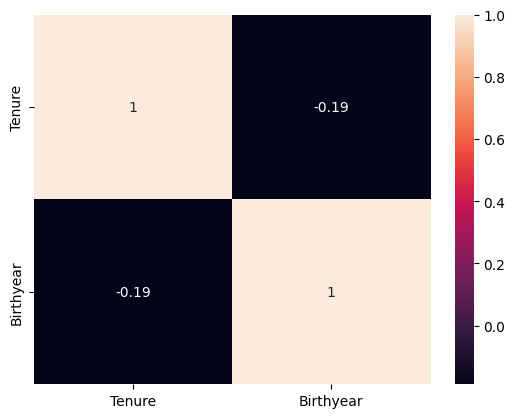

In [9]:
sns.heatmap(df[['Tenure', 'Birthyear']].corr('spearman'), annot = True)

Карта корреляции говорит о том, что зависимости между возрастом и длительностью статуса нет.

In [10]:
# Удаляем неинформативные признаки: ID, Дату опроса и столбец, в котором практически все значения одинаковые.
df = df.drop(["Person_id", "Survey_date", "Sa_citizen", "Round"], axis = 1)

# Анализ целевой перменной

In [11]:
# Функция для вывода текста на график
def plot_text(ax: plt.Axes):
    """
    Вывод текста на графике barplot
    """
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,  # текст
            # координата xy
            (p.get_x() + p.get_width() / 2., p.get_height()),
            # центрирование
            ha='center',
            va='center',
            xytext=(0, 10),
            # точка смещения относительно координаты
            textcoords='offset points',
            fontsize=14)

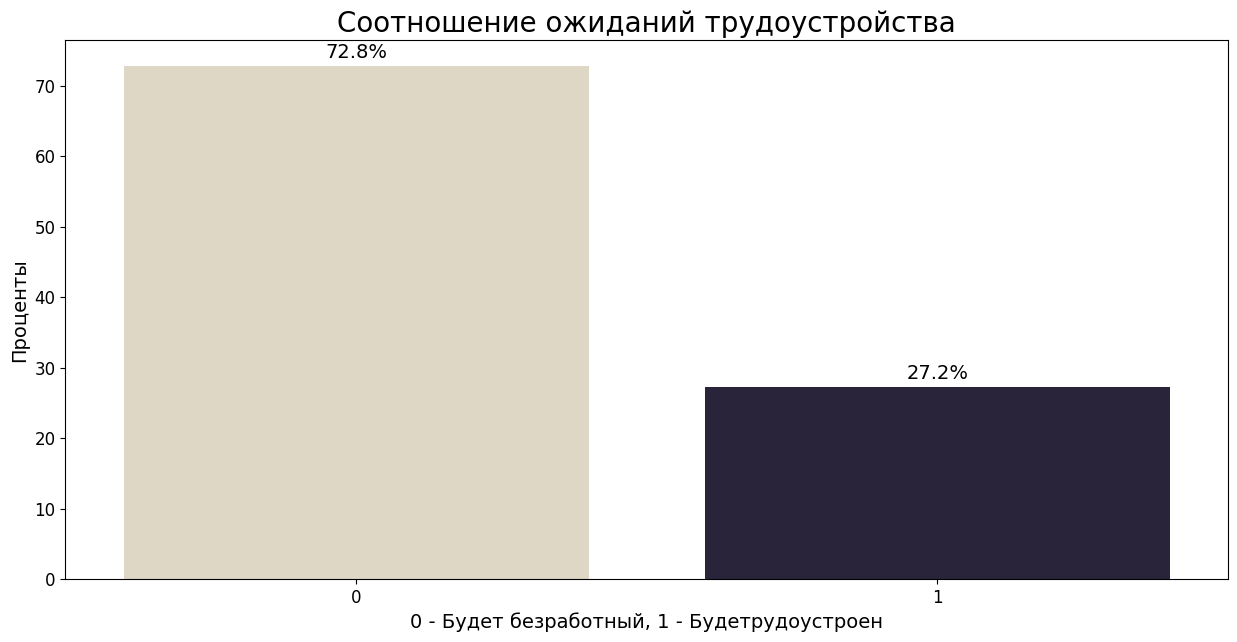

In [12]:
# Нормируем на размер датасета
norm_target = (df.Target.value_counts(
    normalize=True).mul(100).rename('percent').reset_index())

# Вывод фигуры графика
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=df.Target, y='percent', data=norm_target, palette="ch:s=-.2,r=.6")

# Вывод надписей
plot_text(ax)

plt.title('Соотношение ожиданий трудоустройства', fontsize=20)
plt.xlabel('0 - Будет безработный, 1 - Будетрудоустроен', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

В датесете присутствует дисбаланс классов. Это необходимо учитывать при обучении моделей.

In [13]:
# Функция проверки двух категориальных переменных с помощью хи-квадрат и p-value
def check_chi2(x: pd.Series, y: pd.Series, alpha: float = 0.05):
   
    ct_table_ind = pd.crosstab(x, y)
    chi2_stat, p, dof, expected = stats.chi2_contingency(ct_table_ind)
    print(f"chi2 statistic: {chi2_stat:.5g}")
    print(f"p-value {p:.5g}")

    if p < alpha:
        print("Две категориальные переменные имеют значимую связь")
    else:
        print("Две категориальные переменные не имеют значимой связи")

# Гипотезы

<b>Спиок гипотез</b><br><font color = '#000080'>
<i>1. Чем старше человек (чем меньше год рождения), тем более вероятно, что он будет трудоустроен в течение года.<br>
2. Чем выше уровень образования, тем более вероятно, что человек трудоустроен.<br>
3. В городе больше шансов быть трудоустроенным, чем в селе или пригороде.<br>
4. Среди женщин будет больше безработных, чем среди мужчин.<br>
5. Чем дольше человек не трудоустроен, тем скорее он найдёт работу.<br>
6. Если человек на момент опроса безработный, то он скорее всего, будет трудоустроен в течение года.<br>
7. Вероятность найти работу в течение года  в столичных провинциях выше, чем в остальных.<br>
8. Выпускники частных школ, которые меньше звисят от государства, будут трудоустроены в течение года.<br>
9. Люди с продвинутым знанием англиского будут трудоустроены в течение года.<br>
10. Базового знания англиского достаточно, чтобы быть трудоустроенным в течение года.<br>

В первую очередь взяты признаки, которые заполнены полностью и более 50%. Они более информативные.

<font color = '#000080' size = 3> <i><u>1. Чем старше человек (чем меньше год рождения), тем более вероятно, что он будет трудоустроен в течение года.

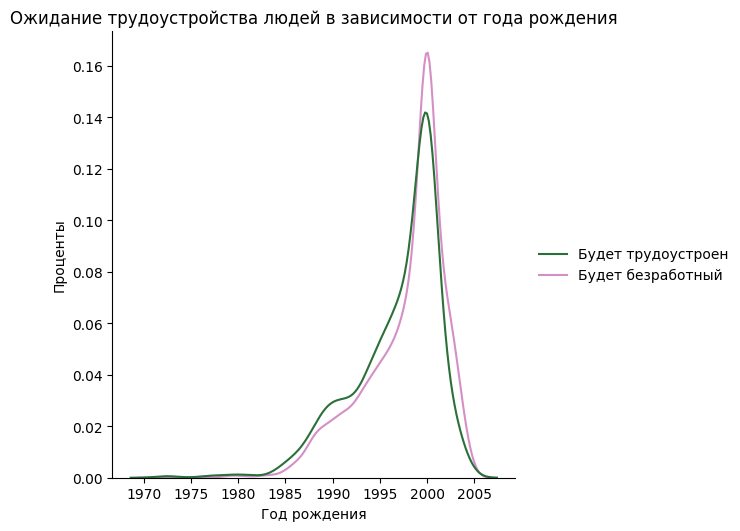

In [14]:
sns.displot(
    {
        "Будет трудоустроен": df[df.Target == 1].Birthyear,
        "Будет безработный": df[df.Target == 0].Birthyear,
    },
    common_norm=False,
    kind="kde",
    palette = 'cubehelix',
    height=5)
plt.title('Ожидание трудоустройства людей в зависимости от года рождения')
plt.xlabel('Год рождения')
plt.ylabel('Проценты')
plt.show()

Распределения в целом одинаковые, но среди родившихся до 2000 года побольше работающих, чем безработных, а среди тех, кто родился в 2000 году и позже, побольше безработных.
Принимаем гипотезу.

<font color = '#000080' size = 3> <i><u>2. Чем выше уровень образования, тем более вероятно, что человек трудоустроен.

In [15]:
def barplot_group(df_data: pd.DataFrame, col_main: str, col_group: str,
                  title: str) -> None:
    """
    Построение barplot с нормированными данными с выводом значений на графике
    """

    plt.figure(figsize=(15, 6))

    data = (df_data.groupby(
        [col_group])[col_main].value_counts(normalize=True).rename(
            'percentage').mul(100).reset_index().sort_values(col_group))

    ax = sns.barplot(x=col_main,
                     y="percentage",
                     hue=col_group,
                     data=data,
                     palette="ch:start=.2,rot=-.3"
                     )

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,  # текст
            (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
            ha='center',  # центрирование
            va='center',
            xytext=(0, 7),
            textcoords='offset points',  # точка смещения относительно координаты
            fontsize=12)

    plt.title(title, fontsize=16)
    plt.ylabel('Percentage', fontsize=14)
    plt.xlabel(col_main, fontsize=14)
    plt.show()

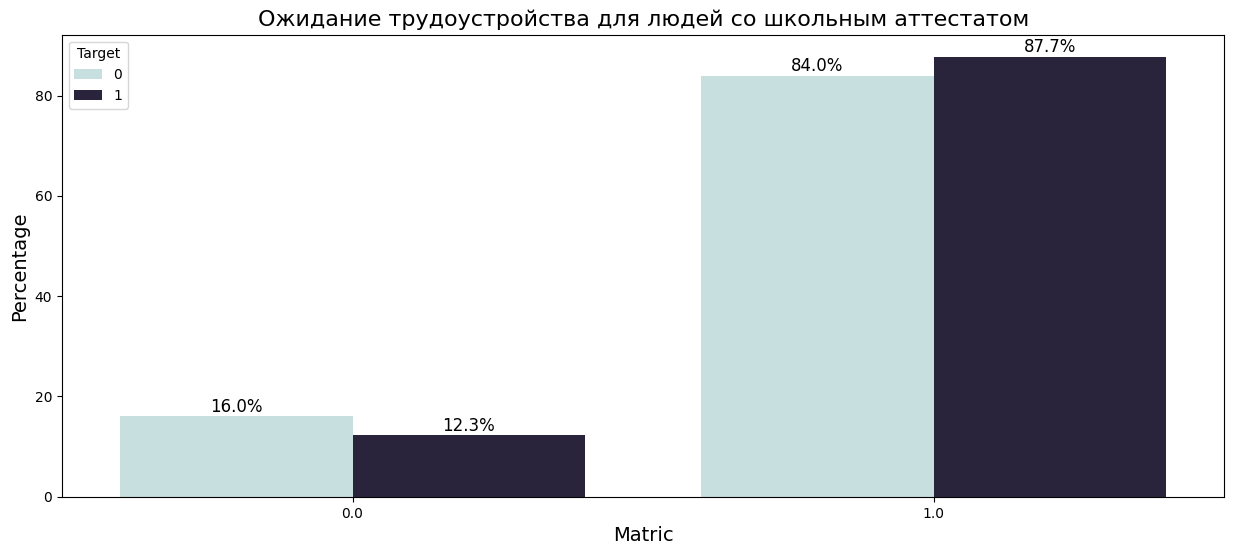

In [16]:
barplot_group(df, "Matric", "Target", 'Ожидание трудоустройства для людей со школьным аттестатом')

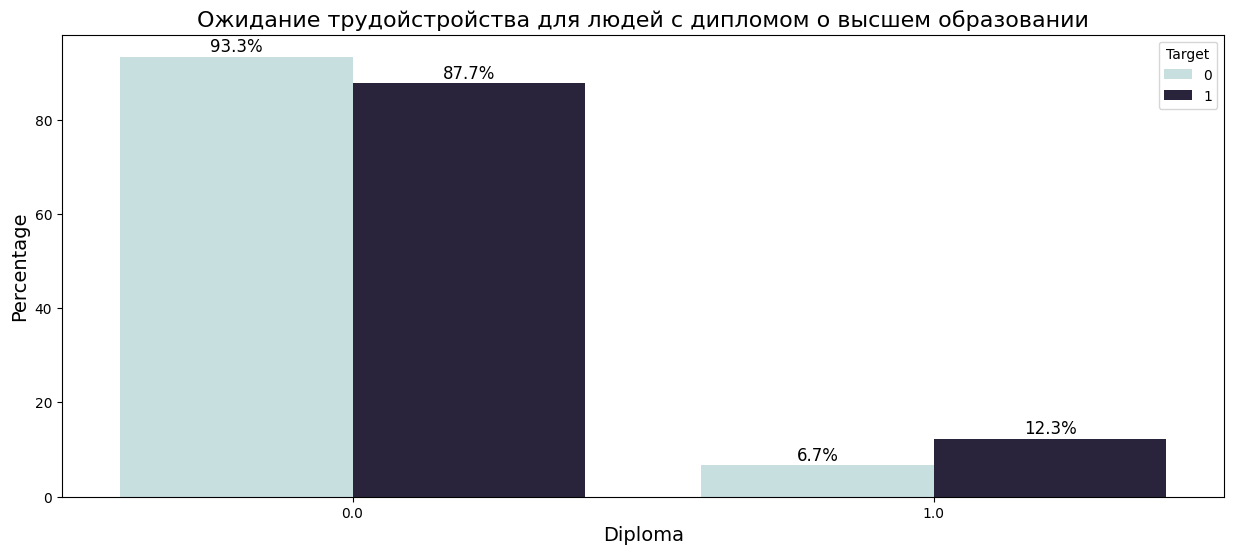

In [17]:
barplot_group(df, "Diploma", "Target", 'Ожидание трудойстройства для людей с дипломом о высшем образовании')

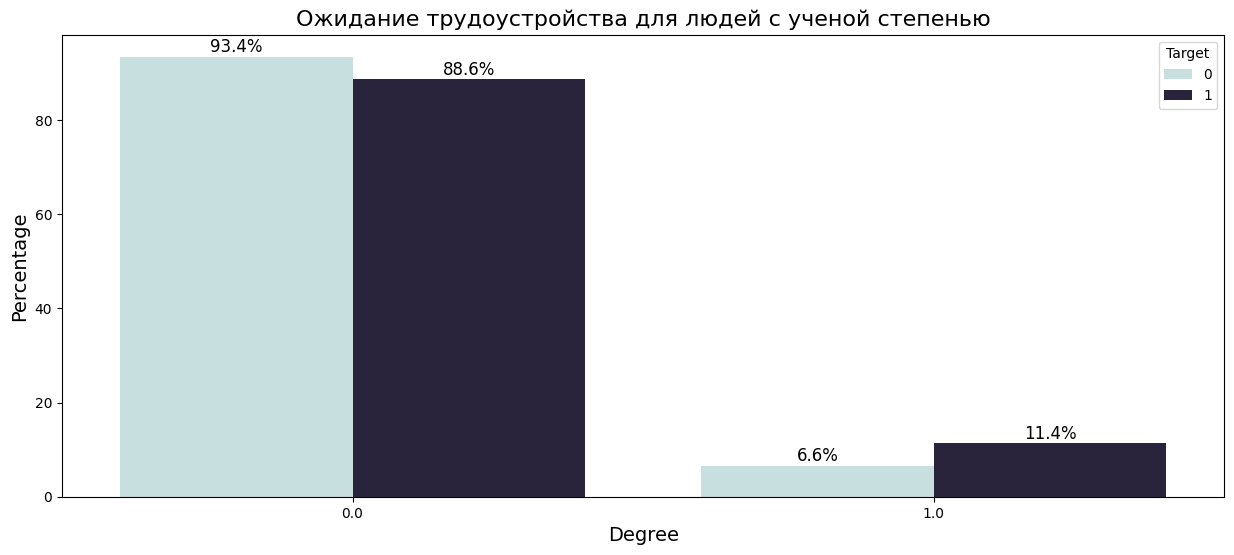

In [18]:
barplot_group(df, "Degree", "Target", 'Ожидание трудоустройства для людей c ученой степенью')

In [19]:
check_chi2(df['Matric'], df['Target'])
check_chi2(df['Diploma'], df['Target'])
check_chi2(df['Degree'], df['Target'])

chi2 statistic: 6.6725
p-value 0.0097909
Две категориальные переменные имеют значимую связь
chi2 statistic: 17.356
p-value 3.0996e-05
Две категориальные переменные имеют значимую связь
chi2 statistic: 13.022
p-value 0.00030784
Две категориальные переменные имеют значимую связь


Отвергаем гипотезу. Со школьным аттеатстом без прочего образования легче трудоустроиться, чем с высшим, и тем более степенью. Причем со школьным образованием прямая зависимость с прогнозом трудосутройства, а с высшим и степенью - обратная. Возможно, это связано с низким спросом на высококвалифициорванных специалистов в стране, но этот вопрос выходит за рамки данного исследования.

<font color = '#000080' size = 3> <i><u>3. В городе больше шансов быть трудоустроенным, чем в селе или пригороде.

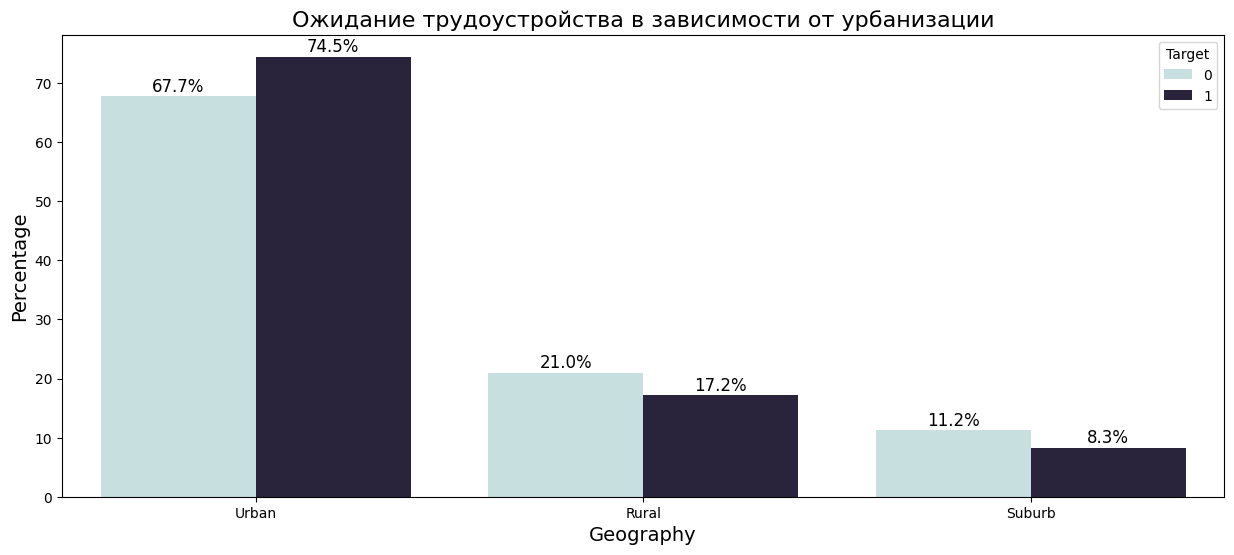

In [20]:
barplot_group(df, "Geography", "Target", 'Ожидание трудоустройства в зависимости от урбанизации')

In [21]:
check_chi2(df['Geography'], df['Target'])

chi2 statistic: 17.43
p-value 0.00016413
Две категориальные переменные имеют значимую связь


Принимаем гипотезу. Из графиков видно, что в городах количество трудоустроенных больше, чем безработных, а в пригородах и селах наоборот - больше безработных.

<font color = '#000080' size = 3> <i><u>4. Среди женщин больше безработных, чем среди мужчин.

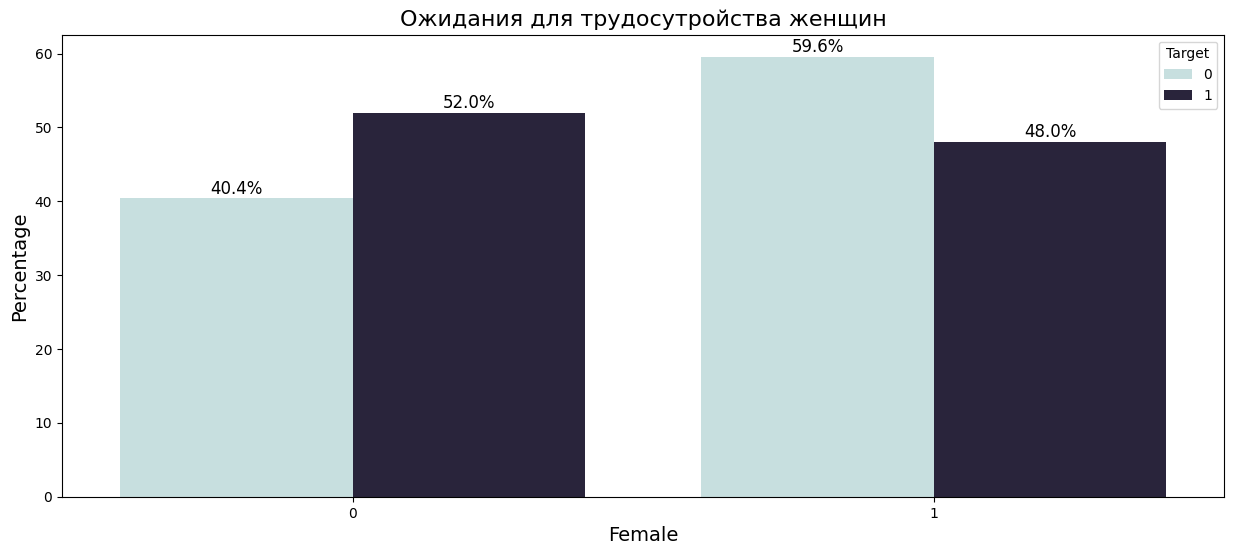

In [22]:
barplot_group(df, "Female", "Target", 'Ожидания для трудосутройства женщин')

In [23]:
check_chi2(df['Female'], df['Target'])

chi2 statistic: 42.716
p-value 6.3282e-11
Две категориальные переменные имеют значимую связь


Принимаем гипотезу. Среди безработных 60% женщин, а среди работающих 48%. Но это может быть не связано с тем, что женщин менее охотно берут на работу. До последних лет в африканской культуре для женщин престижнее было выйти замуж и родить ребёнка. Этот момент надо исследовать отдельно.

<font color = '#000080' size = 3> <i><u>5. Чем дольше человек не трудоустроен, тем скорее он найдёт работу.

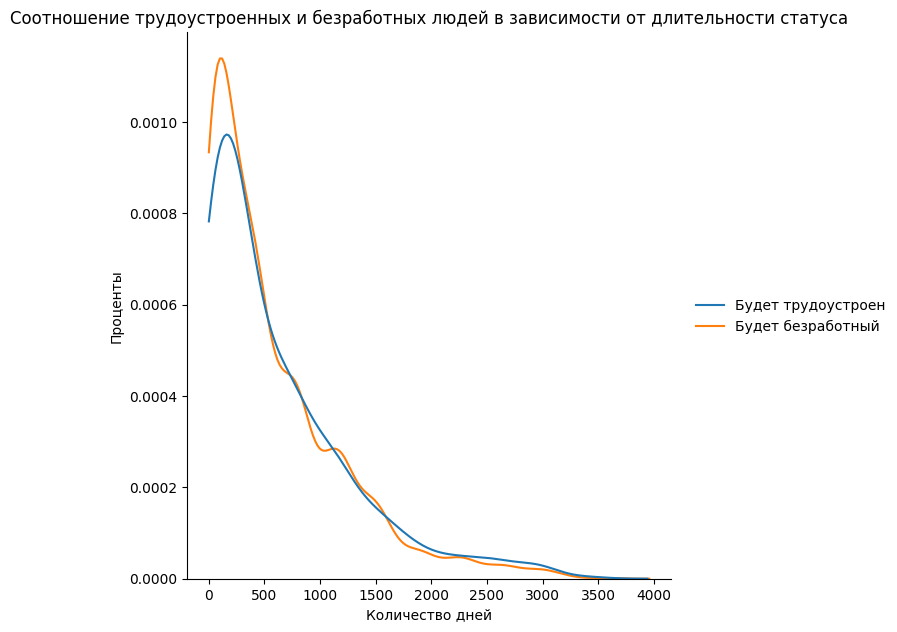

In [24]:
sns.displot(
    {
        "Будет трудоустроен": df[df.Target == 1].Tenure,
        "Будет безработный": df[df.Target == 0].Tenure,
    },
    common_norm=False,
    kind="kde",
    height=6,
    clip = (0, 4000),
    )

plt.title('Соотношение трудоустроенных и безработных людей в зависимости от длительности статуса')
plt.xlabel('Количество дней')
plt.ylabel('Проценты')
plt.show()

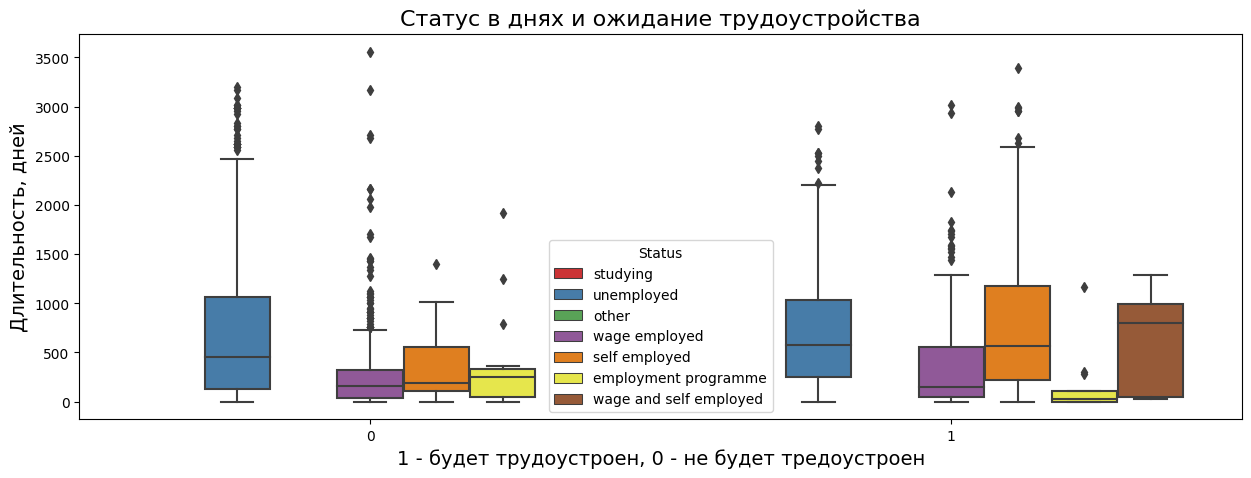

In [25]:
plt.figure(figsize=(15, 5))

ax = sns.boxplot(x='Target', y='Tenure', hue='Status', data=df, palette='Set1')
plt.title('Статус в днях и ожидание трудоустройства', fontsize=16)
plt.ylabel('Длительность, дней', fontsize=14)
plt.xlabel('1 - будет трудоустроен, 0 - не будет тредоустроен', fontsize=14)
plt.show()

Принимаем гипотезу. 
На графие плотности видно, что из тех, кто сменил статус менее 500 дней назад, меньше трудоустроенных.
Обратим внимание на вес этого признака, при обучении моделей.<br>
На боксплотах для тех безработных, кто в течение года найдет работу, выше в днях распределение и медиана. Это говорит о том, что чем дольше люди ищут работу, тем более вероятно, что они её найдут.

Eщё видим, что для статусов "учащийся", "другие" длительность статуса не указана. В контексте задачи заполним пропуски в признаке Tenure для этих статусов нулями.

In [26]:
df['Tenure'] = np.where(df.Status == 'studying', 0, df.Tenure)
df['Tenure'] = np.where(df.Status == 'other', 0, df.Tenure)
df.Tenure.isnull().sum()

150

Осталось всего лишь 150 пропусков, было примерно 1400

In [27]:
# Проверим ещё пропушенное значение на боксплоте, выведем строки по условию.
df.loc[(df['Status'] == 'wage and self employed') & (df['Target'] == 0)]

,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Birthyear,Birthmonth,Target


Пустые строки говорят о том, что среди наемных работников, которые ещё + самозанятые, не ожидается безработных.
Этот фактор должен быть важным в обучении алгоритмов.

<font color = '#000080' size = 3> <i><u>6. Если человек на момент опроса безработный, то он скорее всего, будет трудоустроен в течение года.

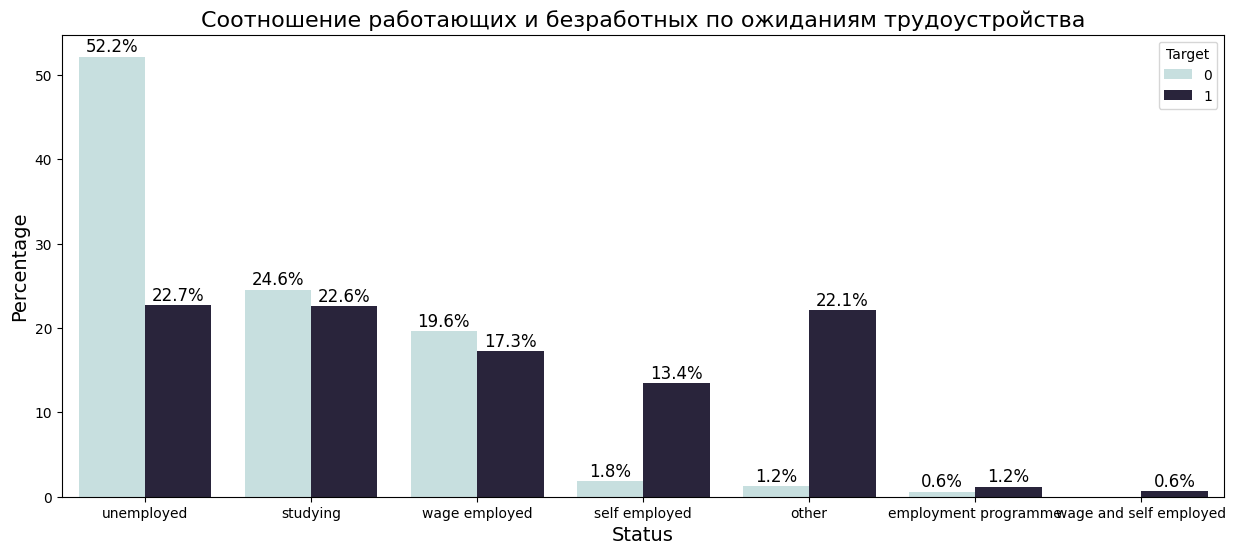

In [28]:
barplot_group(df, "Status", "Target", 'Соотношение работающих и безработных по ожиданиям трудоустройства')

In [29]:
check_chi2(df['Status'], df['Target'])

chi2 statistic: 902.2
p-value 1.2563e-191
Две категориальные переменные имеют значимую связь


Отвергаем гипотезу. Около 52% среди ожидаемых безработных - уже безработные.
Если человек безработный, то он скорее всего не найдет работу в течение года, если учится или наемный, то скорее потеряет.
Если самозанятый или занят прочей деятельностью, то, скорее всего, так и будет работать.
Заметим, что предыдущий вывод говорил о том, больше трудоустраиваются те, кто ищет работу более 500 дней, т.е. примерно от 1,5 лет.

<font color = '#000080' size = 3> <i><u>7. В ЮАР три столицы: законодательная Кейптаун (провинция Western Cape), административная Претория (провинция Gauteng), судебная Блумфонтейн (провинция Free State). Вероятность найти работу в течение года  в столичных провинциях выше, чем в остальных.

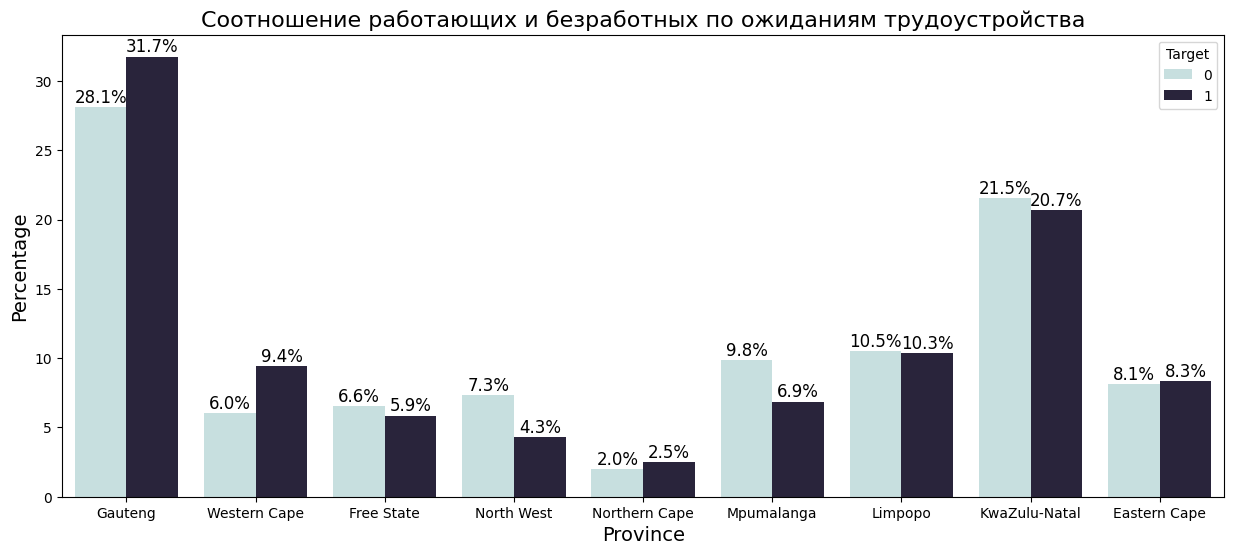

In [30]:
barplot_group(df, "Province", "Target", 'Соотношение работающих и безработных по ожиданиям трудоустройства')

In [31]:
check_chi2(df['Province'], df['Target'])

chi2 statistic: 37.718
p-value 8.4862e-06
Две категориальные переменные имеют значимую связь


Принимаем гипотезу. В провинциях Гаутенг и Вестерн Кейп явно больше ожидания трудоустройства, за счет чего в целом ожидание трудоустройства дает перевес, но во Фри Стейте вероятность трудоустройства меньше.

<font color = '#000080' size = 3> <i><u>8. Выпускники частных школ, которые меньше звисят от государства, будут трудоустроены в течение года.

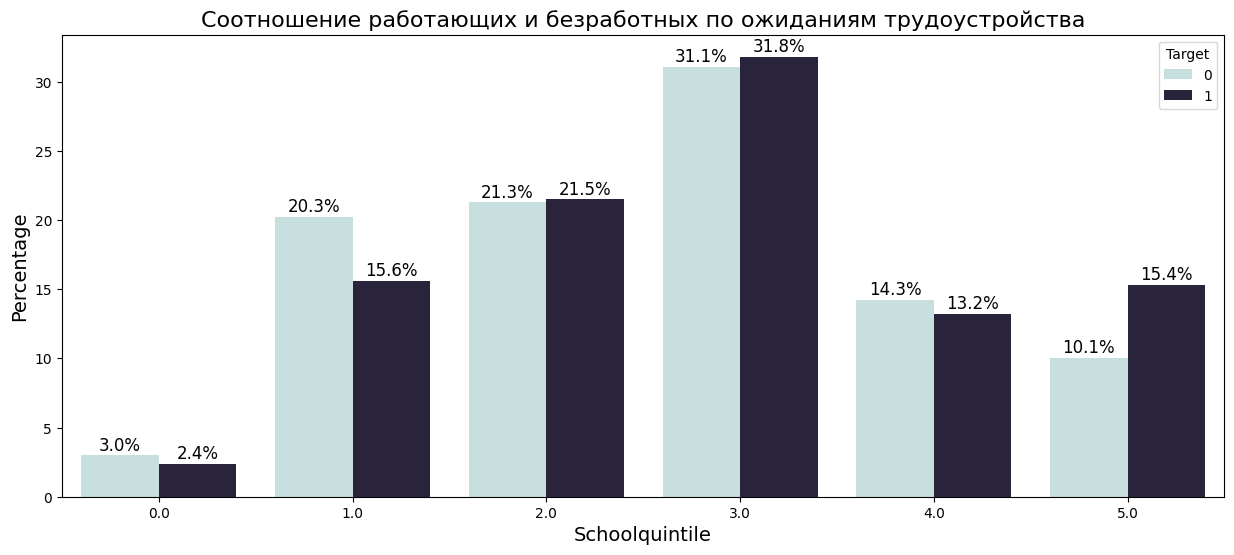

In [32]:
barplot_group(df, "Schoolquintile", "Target", 'Соотношение работающих и безработных по ожиданиям трудоустройства')

In [33]:
check_chi2(df['Schoolquintile'], df['Target'])

chi2 statistic: 18.685
p-value 0.0022001
Две категориальные переменные имеют значимую связь


Не принимаем гипотезу. Из барплота видно, что явно больше трудоутсроенных ожидается только после школ квантиля 5 (самые дорогие частные). У школ кваниля 4 ниже ожидание трудоустройства. У квантиля 3 ожидание трудоустройства выше.

<font color = '#000080' size = 3> <i><u>9.Люди с продвинутым знанием англиского будут трудоустроены в течение года.

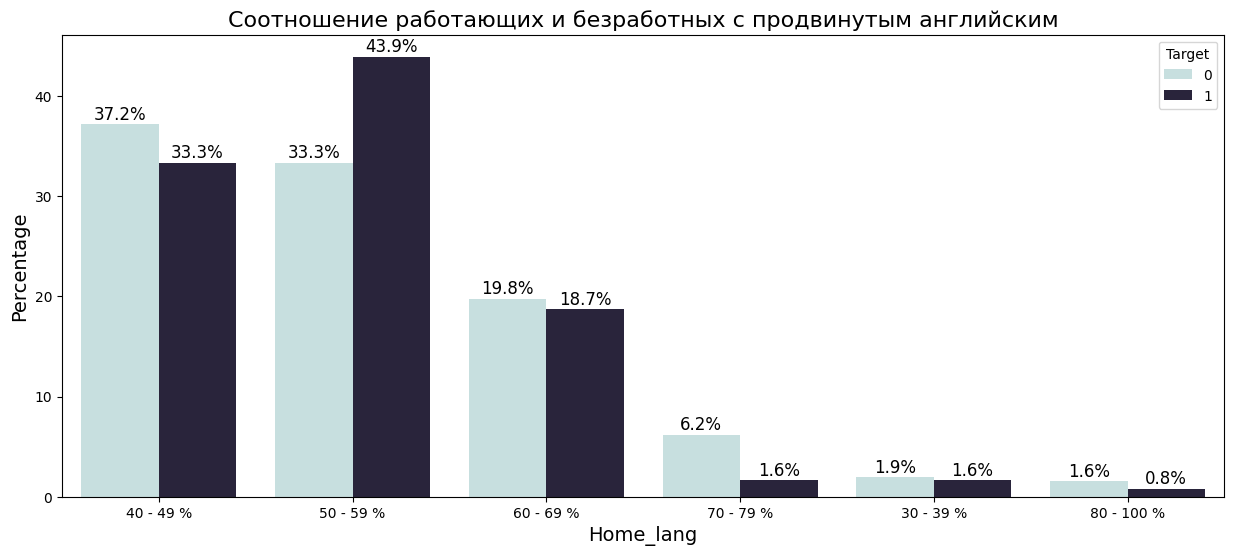

In [34]:
barplot_group(df, "Home_lang", "Target", 'Соотношение работающих и безработных с продвинутым английским')

In [35]:
check_chi2(df['Home_lang'], df['Target'])

chi2 statistic: 7.0091
p-value 0.21996
Две категориальные переменные не имеют значимой связи


Отвергаем гипотезу. На графике не видно связи и проверка хи-квадрат говорит о её отсутсвии.

<font color = '#000080' size = 3> <i><u>10. Базового знания англиского достаточно, чтобы быть трудоустроенным в течение года.

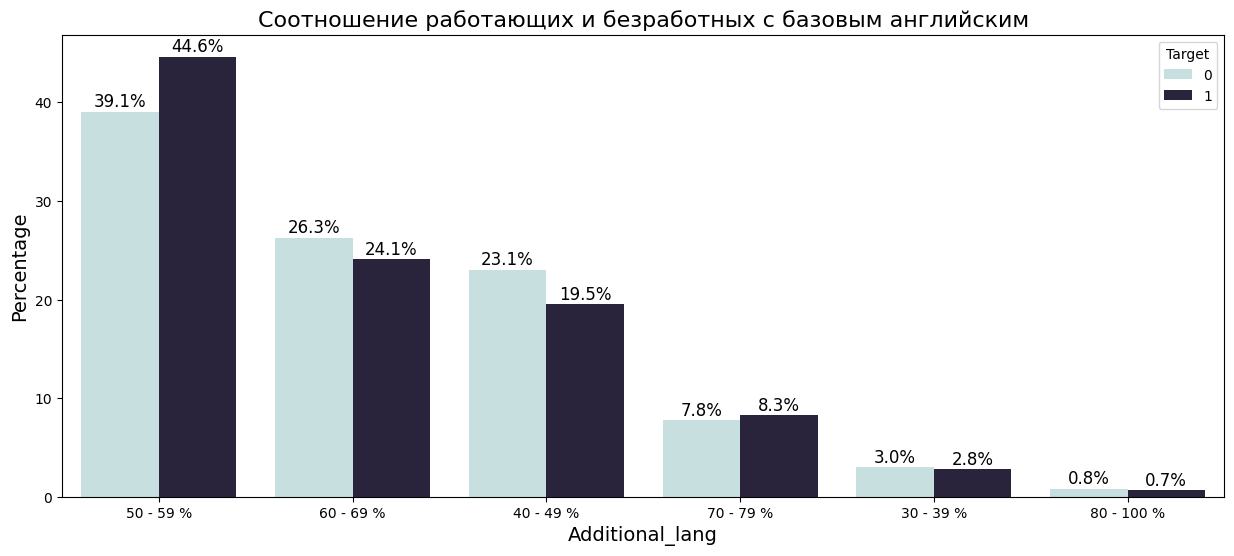

In [36]:
barplot_group(df, "Additional_lang", "Target", 'Соотношение работающих и безработных с базовым английским')

In [37]:
check_chi2(df['Additional_lang'], df['Target'])

chi2 statistic: 6.4603
p-value 0.26397
Две категориальные переменные не имеют значимой связи


Отвергаем гипотезу, зависимости нет.
С учетом предыдущей гипотезы, можно сделать вывод, что знание английского почти влияет на возможность трудоустройства

<b><font size = 3> По итогам разведочного анализа можно сделать вывод о том, что в ЮАР работу легко потерять и сложно найти.</b><br>
Особенно меньше вероятности, что трудоустроятся:
   - женщины
   - люди с высшим образованием и ученой степенью
   - деревенские  жители
   - молодые люди 2000 года рождения и младше
<br>

Уровень образования не дает никакой гарантии трудосутройства,в том числе частные школы, хорошее знание английского языка, высшее образование. Возможно, образованные люди эмигририуют из ЮАР в более развитые государства.<br>
Более всего необходима помощь государства в трудоустройстве молодым людям с высшим образованием.